# EE 508 HW 1 Part 3: Regression and Classification Review


### Import Packages

We begin by importing the necessary libraries for this assignment:

- **Data Manipulation**: `numpy` and `pandas` for handling arrays and dataframes.
- **Visualization**: `matplotlib.pyplot` for creating plots.
- **Scikit-Learn (sklearn)**: A comprehensive machine learning library.
  - `model_selection`: For splitting data into training and testing sets.
  - `linear_model`: For Logistic Regression, Ridge, Lasso, and Linear Regression models.
  - `ensemble`: For Random Forest and Gradient Boosting classifiers.
  - `naive_bayes`: For the Gaussian Naive Bayes classifier.
  - `preprocessing`: For scaling features (`StandardScaler`).
  - `metrics`: For evaluating models (accuracy, MSE, R2 score, confusion matrix).
  - `datasets`: For loading sample datasets (Iris, Breast Cancer).
- **PyTorch**: `torch` for potential neural network components (though primarily sklearn is used in the exercises above).

We also set the random seed for reproducibility and configure plot styles.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris, load_breast_cancer, make_classification
import torch
import torch.nn as nn
import torch.optim as optim

%matplotlib inline
plt.style.use(['ggplot'])
np.random.seed(42)

## 1. Quick Pandas Review

Pandas is a powerful library for data manipulation and analysis in Python. In this section, we'll review key concepts.

### **TODO 1:** Pandas Basics

Create a pandas DataFrame with the following data:
- Column 'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve']
- Column 'Age': [25, 30, 35, 28, 32]
- Column 'Salary': [50000, 60000, 75000, 55000, 70000]

**Detailed Steps:**
1. Use `pd.DataFrame()` with a dictionary to create the DataFrame
2. Print the entire DataFrame using `print(df)`
3. Calculate the mean salary using `df['Salary'].mean()`
4. Filter rows where Age > 28 using boolean indexing: `df[df['Age'] > 28]`
5. Add a new column 'Salary_per_Age' by dividing Salary by Age
6. Print the updated DataFrame to verify the new column was added

In [50]:
# Skeleton for TODO 1

# Create DataFrame
df = pd.DataFrame({
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [25, 30, 35, 28, 32],
    'Salary': [50000, 60000, 75000, 55000, 70000]
})



print("DataFrame:")
print(df, '\n')

# Mean Salary
# ... your code here ...
print("Mean Salary: ", df['Salary'].mean(), '\n')

# Filter rows
# ... your code here ...
print("Filtered Rows:\n", df[df['Age']>28], '\n')

# Add new column and print
# ... your code here ...
df['Salary_per_Age'] = df['Salary']/df['Age']
print("New Column: \n", df, '\n')

DataFrame:
      Name  Age  Salary
0    Alice   25   50000
1      Bob   30   60000
2  Charlie   35   75000
3    David   28   55000
4      Eve   32   70000 

Mean Salary:  62000.0 

Filtered Rows:
       Name  Age  Salary
1      Bob   30   60000
2  Charlie   35   75000
4      Eve   32   70000 

New Column: 
       Name  Age  Salary  Salary_per_Age
0    Alice   25   50000     2000.000000
1      Bob   30   60000     2000.000000
2  Charlie   35   75000     2142.857143
3    David   28   55000     1964.285714
4      Eve   32   70000     2187.500000 



## 2. Regression on Housing Prices

In this section, we'll use a simple housing dataset to perform regression analysis using pandas and sklearn.

In [51]:
# Generate realistic housing dataset (no download needed!)
# Based on California Housing characteristics but created locally

np.random.seed(42)
n_samples = 20640  # Same size as California Housing dataset

# Generate features with realistic ranges
MedInc = np.random.exponential(3.5, n_samples)  # Median income (in $10k)
HouseAge = np.random.uniform(1, 52, n_samples)  # House age (years)
AveRooms = np.random.gamma(4, 1.5, n_samples)  # Average rooms
AveBedrms = np.random.gamma(1.2, 0.5, n_samples)  # Average bedrooms
Population = np.random.exponential(1000, n_samples)  # Block population
AveOccup = np.random.gamma(3, 1, n_samples)  # Average occupancy
Latitude = np.random.uniform(32.5, 42, n_samples)  # California latitude
Longitude = np.random.uniform(-124.5, -114, n_samples)  # California longitude

# Generate realistic price based on features (in $100k)
# Price influenced by income, house age (negative), rooms, location
Price = (
    0.45 * MedInc +  # Income is main factor
    -0.01 * HouseAge +  # Older houses worth less
    0.05 * AveRooms +  # More rooms = higher price
    -0.3 * np.abs(Latitude - 37.5) +  # Central California more expensive
    -0.2 * np.abs(Longitude + 119) +  # Coastal areas more expensive
    np.random.normal(0, 0.5, n_samples)  # Add noise
)
Price = np.clip(Price, 0.5, 5.0)  # Realistic price range

# Create DataFrame
housing_data = pd.DataFrame({
    'MedInc': MedInc,
    'HouseAge': HouseAge,
    'AveRooms': AveRooms,
    'AveBedrms': AveBedrms,
    'Population': Population,
    'AveOccup': AveOccup,
    'Latitude': Latitude,
    'Longitude': Longitude,
    'Price': Price
})

print("🏠 Housing Dataset (Realistic California-style data - No download required!)")
print(housing_data.head())
print(f"\nDataset shape: {housing_data.shape}")
print(f"\nFeature descriptions:")
print(f"  MedInc     - Median income in block group (in $10,000s)")
print(f"  HouseAge   - Median house age in block group")
print(f"  AveRooms   - Average number of rooms per household")
print(f"  AveBedrms  - Average number of bedrooms per household")
print(f"  Population - Block group population")
print(f"  AveOccup   - Average household occupancy")
print(f"  Latitude   - Latitude of block group")
print(f"  Longitude  - Longitude of block group")
print(f"  Price      - Median house value in block group (in $100,000s)")
print(f"\nStatistics:\n{housing_data.describe()}")

🏠 Housing Dataset (Realistic California-style data - No download required!)
      MedInc   HouseAge  AveRooms  AveBedrms   Population  AveOccup  \
0   1.642438  18.043376  5.996668   2.747711   485.885759  3.963741   
1  10.535425  18.898620  7.703154   0.235783   210.295710  0.346653   
2   4.608610   3.631730  8.535462   0.728460   335.727193  4.971332   
3   3.195299   7.073811  8.136975   0.526241  1238.316253  2.000612   
4   0.593687  10.851426  6.226264   0.506739   822.991719  4.506845   

    Latitude   Longitude     Price  
0  39.814432 -122.840697  0.500000  
1  40.214854 -119.603258  3.084443  
2  35.480570 -124.339356  1.521066  
3  40.835820 -114.915344  0.500000  
4  34.271200 -118.141597  0.500000  

Dataset shape: (20640, 9)

Feature descriptions:
  MedInc     - Median income in block group (in $10,000s)
  HouseAge   - Median house age in block group
  AveRooms   - Average number of rooms per household
  AveBedrms  - Average number of bedrooms per household
  Populatio

### **TODO 2:** Implement Housing Price Regression

**Detailed Steps:**
1. **Extract features and target:**
   - Select three features: 'MedInc', 'HouseAge', 'AveRooms' from housing_data
   - Extract the 'Price' column as the target variable
   - Convert both to numpy arrays using `.values`

2. **Split the data:**
   - Use `train_test_split()` with test_size=0.2 and random_state=42
   - This creates X_train, X_test, y_train, y_test

3. **Train the model:**
   - Create a `LinearRegression()` instance
   - Fit it using `model.fit(X_train, y_train)`

4. **Make predictions:**
   - Predict on training set: `y_train_pred = model.predict(X_train)`
   - Predict on test set: `y_test_pred = model.predict(X_test)`

5. **Calculate metrics:**
   - Use `mean_squared_error()` for MSE on both sets
   - Use `r2_score()` for R² on both sets
   - Print all metrics

6. **Visualize results:**
   - Create a scatter plot of actual vs predicted prices
   - Add a diagonal line representing perfect predictions
   - Label axes and add a title

Training MSE: 0.2415, Test MSE: 0.2499
Training R2: 0.7890, Test R2: 0.7823


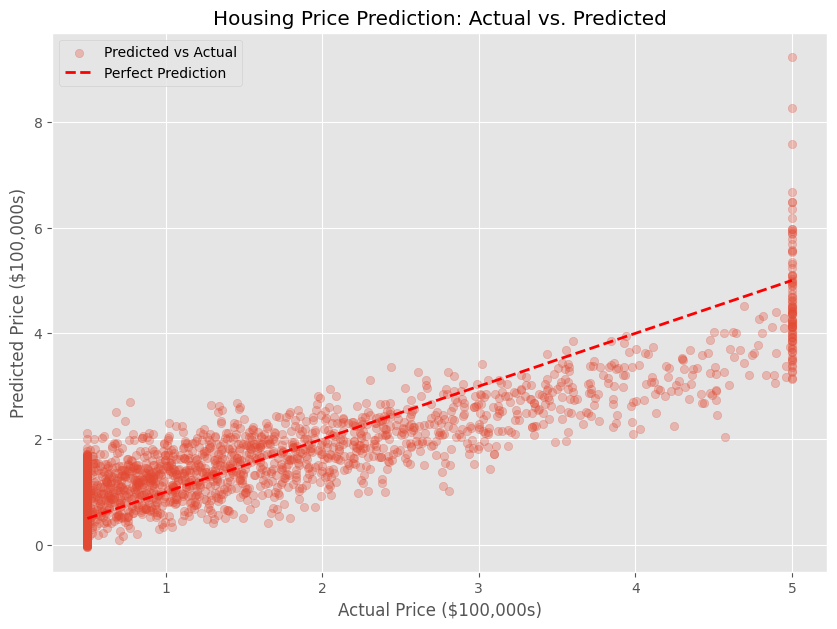

In [52]:
# Skeleton for TODO 2

# Extract features and target (using California Housing features)
X_housing = housing_data[['MedInc', 'HouseAge', 'AveRooms']].values
y_housing = housing_data['Price'].values

# 1. Split data into train/test
x_train, x_test, y_train, y_test = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# 2. Train linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 3. Make predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# 4. Calculate metrics
train_MSE, test_MSE = mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)
train_R2, test_R2 = r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)

print(f"Training MSE: {train_MSE:.4f}, Test MSE: {test_MSE:.4f}")
print(f"Training R2: {train_R2:.4f}, Test R2: {test_R2:.4f}")

# 5. Visualize results
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, alpha=0.3, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price ($100,000s)')
plt.ylabel('Predicted Price ($100,000s)')
plt.title('Housing Price Prediction: Actual vs. Predicted')
plt.legend()
plt.grid(True)
plt.show()


## 3. Binary Classification with Multiple Loss Functions

This section demonstrates different loss functions used in binary classification: MSE, 0/1 loss, Hinge loss, and Binary Cross Entropy.

In [53]:
# Generate synthetic binary classification dataset
X, y = make_classification(n_samples=300, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1,
                           random_state=42)

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Class distribution in training: {np.bincount(y_train)}")

Training set size: 240
Test set size: 60
Class distribution in training: [121 119]


### **TODO 3:** Implement Loss Functions and Compare

**Detailed Steps:**
1. **Implement four loss functions:**
   - `mse_loss(y_true, y_pred)`: Mean Squared Error
   - `zero_one_loss(y_true, y_pred)`: Misclassification rate
   - `hinge_loss(y_true, y_pred)`: SVM-style hinge loss (convert labels to {-1, 1})
   - `binary_cross_entropy_loss(y_true, y_pred)`: Log loss for classification

2. **Train a logistic regression model:**
   - Create `LogisticRegression(max_iter=1000)` instance
   - Fit on X_train, y_train

3. **Get different prediction formats:**
   - `decision_function()`: Get raw logits for MSE and Hinge loss
   - `predict_proba()`: Get probabilities for Binary Cross-Entropy
   - `predict()`: Get binary labels for 0/1 loss

4. **Calculate all four losses on test set:**
   - Apply each loss function with appropriate prediction format
   - Print all four loss values

5. **Additional metrics:**
   - Calculate R² score
   - Calculate accuracy (1 - zero_one_loss)

In [54]:
# Skeleton for TODO 3

def mse_loss(y_true, y_pred):
    """
    Mean Squared Error Loss
    """
    return np.mean((y_true - y_pred)**2)

def zero_one_loss(y_true, y_pred):
    """
    0/1 Loss
    """
    return np.mean(y_true != y_pred)

def hinge_loss(y_true, y_pred):
    """
    Hinge Loss
    y_true: binary labels (0, 1)
    y_pred: decision function output (logits)
    """
    y_true_transformed = np.where(y_true == 1, 1, -1)
    return np.mean(np.maximum(0, 1 - y_true_transformed * y_pred))

def binary_cross_entropy_loss(y_true, y_pred_proba):
    """
    Binary Cross Entropy Loss
    y_pred_proba: predicted probabilities
    """

    epsilon = 1e-9
    y_pred_proba = np.clip(y_pred_proba, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_proba) + (1 - y_true) * np.log(1 - y_pred_proba))

print("Loss functions implemented successfully!")

Loss functions implemented successfully!


In [55]:
# Skeleton for TODO 3 (continued)

# Train logistic regression model
model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train, y_train)

# Get predictions as logits and probabilities
y_pred_logits = model_lr.decision_function(X_test)
y_pred_proba = model_lr.predict_proba(X_test)[:, 1] # Probability of the positive class
y_pred_binary = model_lr.predict(X_test)

# Calculate all four losses
mse = mse_loss(y_test, y_pred_logits)
zero_one = zero_one_loss(y_test, y_pred_binary)
hinge = hinge_loss(y_test, y_pred_logits)
bce = binary_cross_entropy_loss(y_test, y_pred_proba)

# Calculate additional metrics
accuracy = accuracy_score(y_test, y_pred_binary)
r2 = r2_score(y_test, y_pred_proba) # R2 for probability predictions

# Print results
print(f"MSE Loss: {mse:.4f}")
print(f"0/1 Loss (Misclassification Rate): {zero_one:.4f}")
print(f"Hinge Loss: {hinge:.4f}")
print(f"Binary Cross Entropy Loss: {bce:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test R2 Score (from probabilities): {r2:.4f}")


MSE Loss: 11.0115
0/1 Loss (Misclassification Rate): 0.0500
Hinge Loss: 0.1428
Binary Cross Entropy Loss: 0.1682
Test Accuracy: 0.9500
Test R2 Score (from probabilities): 0.8230


## 4. Naive Bayes Classification

Naive Bayes is a simple probabilistic classifier based on Bayes' theorem with strong independence assumptions.

### **TODO 4:** Naive Bayes on Iris Dataset

**Detailed Steps:**
1. **Load the Iris dataset:**
   - Use `load_iris()` to get the dataset
   - Extract features (X) and labels (y)

2. **Split the data:**
   - Use `train_test_split()` with test_size=0.2, random_state=42
   - Creates X_train, X_test, y_train, y_test

3. **Train Gaussian Naive Bayes:**
   - Create `GaussianNB()` instance
   - Fit on training data

4. **Evaluate the model:**
   - Calculate training accuracy using `.score()`
   - Calculate test accuracy using `.score()`
   - Print both accuracies

5. **Print confusion matrix:**
   - Use `confusion_matrix()` on test predictions
   - This shows which classes are confused with each other

6. **Print classification report:**
   - Use `classification_report()` with target names
   - Shows precision, recall, F1-score for each class

7. **Show probabilities and class selection:**
   - Select a few test samples (e.g., first 5)
   - Use `predict_proba()` to get the probability for each class
   - Print the probabilities and the actual selected class (highest probability) to demonstrate how Naive Bayes makes decisions.

8. **Answer the question:**
   - Explain why Naive Bayes is called "naive"
   - Discuss the independence assumption

In [56]:
# Skeleton for TODO 4

# 1. Load Iris dataset
iris = load_iris()
X_iris, y_iris = iris.data, iris.target

# 2. Split data
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# 3. Train GaussianNB
model_gnb = GaussianNB()
model_gnb.fit(X_train_iris, y_train_iris)

# 4. Evaluate
train_accuracy_gnb = model_gnb.score(X_train_iris, y_train_iris)
test_accuracy_gnb = model_gnb.score(X_test_iris, y_test_iris)

print("GNB Training Accuracy: ", train_accuracy_gnb)
print("GNB Test Accuracy: ", test_accuracy_gnb)

# 5. Print confusion matrix and classification report
y_pred_gnb = model_gnb.predict(X_test_iris)
conf_matrix_gnb = confusion_matrix(y_test_iris, y_pred_gnb)
class_report_gnb = classification_report(y_test_iris, y_pred_gnb, target_names=iris.target_names)

print("\nConfusion Matrix (Test Set):\n", conf_matrix_gnb)
print("\nClassification Report (Test Set):\n", class_report_gnb)

# 6. Show probabilities and class selection
print("\nDemonstrating Probabilities for first 5 test samples:")
samples_to_show = 5
for i in range(samples_to_show):
    sample = X_test_iris[i].reshape(1, -1)
    true_label = y_test_iris[i]
    predicted_proba = model_gnb.predict_proba(sample)[0]
    predicted_class = model_gnb.predict(sample)[0]

    print(f"\nSample {i+1}:")
    print(f"Features: {sample[0]}")
    print(f"True Label: {iris.target_names[true_label]}")
    print(f"Predicted Probabilities: {predicted_proba}")
    print(f"Selected Class: {iris.target_names[predicted_class]} (idx: {predicted_class})")

# Question: Why is it called "naive" Bayes?
# Naive Bayes is called "naive" because it makes a strong, simplifying assumption that all features are conditionally independent of each other given the class label. This means it assumes that the presence or absence of a particular feature does not affect the presence or absence of any other feature given the class. Despite this, they often perform well in high-dimensional data and are computationally efficient.

GNB Training Accuracy:  0.95
GNB Test Accuracy:  1.0

Confusion Matrix (Test Set):
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report (Test Set):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Demonstrating Probabilities for first 5 test samples:

Sample 1:
Features: [6.1 2.8 4.7 1.2]
True Label: versicolor
Predicted Probabilities: [5.97327448e-90 9.95635767e-01 4.36423302e-03]
Selected Class: versicolor (idx: 1)

Sample 2:
Features: [5.7 3.8 1.7 0.3]
True Label: setosa
Predicted Probabilities: [1.00000000e+00 4.96158126e-14 6.54922363e-21]
Selected Class: setosa (idx: 0)

Sample 3:
Features: [7.7 2.6 6.9 2.3]
True Label: virginica
Predicted Prob

## 5. Regularization: L1 and L2

Regularization prevents overfitting by adding a penalty term to the loss function. L1 (Lasso) and L2 (Ridge) are two common approaches.

In [57]:
# Generate dataset with many features (high dimensionality)
X_cancer, y_cancer = load_breast_cancer(return_X_y=True)
X_cancer = StandardScaler().fit_transform(X_cancer)

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = \
    train_test_split(X_cancer, y_cancer, test_size=0.2, random_state=42)

print(f"Feature dimension: {X_cancer.shape[1]}")
print(f"Training samples: {X_train_cancer.shape[0]}")

Feature dimension: 30
Training samples: 455


### **TODO 5:** Compare L1 and L2 Regularization

**Detailed Steps:**
1. **Set up the experiment:**
   - Define alpha values: [0.001, 0.01, 0.1, 1, 10]
   - Initialize empty lists to store results for both methods

2. **Train models with different alphas:**
   - Loop through each alpha value
   - For Ridge (L2): Create `Ridge(alpha=alpha)`, fit, record train/test scores
   - For Ridge: Count non-zero coefficients using `np.sum(abs(coef_) > 1e-5)` (Ridge coefs rarely hit exactly zero)
   - For Ridge: Record min and max coefficient values
   - For Lasso (L1): Create `Lasso(alpha=alpha)`, fit, record train/test scores
   - For Lasso: Count non-zero coefficients using `np.sum(coef_ != 0)`
   - For Lasso: Record min and max coefficient values

3. **Visualize results:**
   - Create 2 subplots (1 row, 2 columns)
   - Plot 1: Ridge train/test accuracy vs alpha (log scale)
   - Plot 2: Lasso train/test accuracy vs alpha (log scale)
   - Add labels, titles, legends, and grid

4. **Print comparison table:**
   - Create a formatted table showing alpha, Ridge scores, Lasso scores, non-zero coefficients, and min/max coefficient values for *both* Ridge and Lasso.
   - Use proper column alignment

5. **Answer the question:**
   - Explain the difference between L1 and L2 regularization
   - Discuss when to use each method
   - Explain feature selection property of Lasso

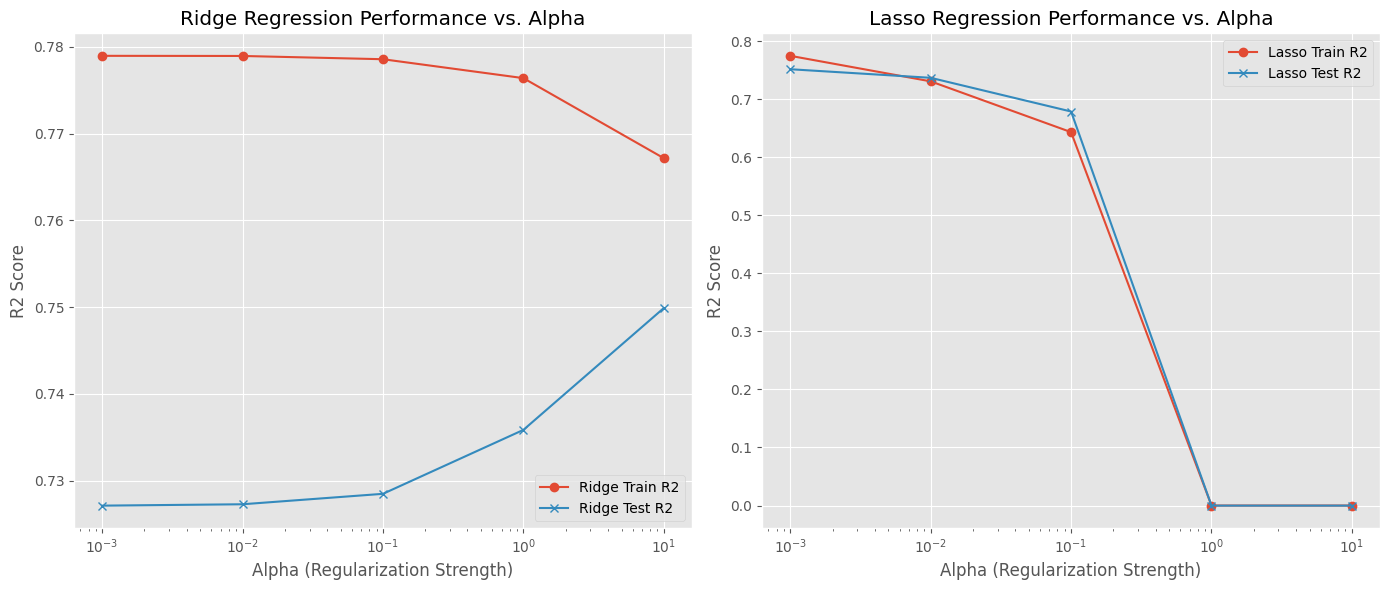


--- Regularization Comparison ---
Alpha     Ridge Train R2 Ridge Test R2  Ridge Non-Zero Ridge Min Coef Ridge Max Coef 
          Lasso Train R2 Lasso Test R2  Lasso Non-Zero Lasso Min Coef Lasso Max Coef 
------------------------------------------------------------------------------------------------------------------------
0.001     0.7790         0.7271         30             -1.0310        0.6804         
          0.7745         0.7514         23             -0.4413        0.2967         
------------------------------------------------------------------------------------------------------------------------
0.010     0.7790         0.7273         30             -0.9943        0.5759         
          0.7306         0.7367         13             -0.1601        0.0137         
------------------------------------------------------------------------------------------------------------------------
0.100     0.7786         0.7285         30             -0.7932        0.4386         


In [58]:
# Skeleton for TODO 5

alphas = [0.001, 0.01, 0.1, 1, 10]

ridge_train_scores = []
ridge_test_scores = []
ridge_non_zero_coefs = []
ridge_min_coefs = []
ridge_max_coefs = []

lasso_train_scores = []
lasso_test_scores = []
lasso_non_zero_coefs = []
lasso_min_coefs = []
lasso_max_coefs = []

for alpha in alphas:
    # Ridge (L2)
    ridge = Ridge(alpha=alpha, random_state=42)
    ridge.fit(X_train_cancer, y_train_cancer)
    ridge_train_scores.append(ridge.score(X_train_cancer, y_train_cancer))
    ridge_test_scores.append(ridge.score(X_test_cancer, y_test_cancer))
    ridge_non_zero_coefs.append(np.sum(np.abs(ridge.coef_) > 1e-5))
    ridge_min_coefs.append(np.min(ridge.coef_))
    ridge_max_coefs.append(np.max(ridge.coef_))

    # Lasso (L1)
    lasso = Lasso(alpha=alpha, random_state=42, max_iter=10000) # Increased max_iter for convergence
    lasso.fit(X_train_cancer, y_train_cancer)
    lasso_train_scores.append(lasso.score(X_train_cancer, y_train_cancer))
    lasso_test_scores.append(lasso.score(X_test_cancer, y_test_cancer))
    lasso_non_zero_coefs.append(np.sum(lasso.coef_ != 0))
    lasso_min_coefs.append(np.min(lasso.coef_))
    lasso_max_coefs.append(np.max(lasso.coef_))

# Plot results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(alphas, ridge_train_scores, label='Ridge Train R2', marker='o')
plt.plot(alphas, ridge_test_scores, label='Ridge Test R2', marker='x')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R2 Score')
plt.title('Ridge Regression Performance vs. Alpha')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(alphas, lasso_train_scores, label='Lasso Train R2', marker='o')
plt.plot(alphas, lasso_test_scores, label='Lasso Test R2', marker='x')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R2 Score')
plt.title('Lasso Regression Performance vs. Alpha')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Print detailed results
print("\n--- Regularization Comparison ---")
print(f"{'Alpha':<10}{'Ridge Train R2':<15}{'Ridge Test R2':<15}{'Ridge Non-Zero':<15}{'Ridge Min Coef':<15}{'Ridge Max Coef':<15}")
print(f"{'':<10}{'Lasso Train R2':<15}{'Lasso Test R2':<15}{'Lasso Non-Zero':<15}{'Lasso Min Coef':<15}{'Lasso Max Coef':<15}")
print("-" * 120)

for i, alpha in enumerate(alphas):
    print(f"{alpha:<10.3f}{ridge_train_scores[i]:<15.4f}{ridge_test_scores[i]:<15.4f}{ridge_non_zero_coefs[i]:<15}{ridge_min_coefs[i]:<15.4f}{ridge_max_coefs[i]:<15.4f}")
    print(f"{'':<10}{lasso_train_scores[i]:<15.4f}{lasso_test_scores[i]:<15.4f}{lasso_non_zero_coefs[i]:<15}{lasso_min_coefs[i]:<15.4f}{lasso_max_coefs[i]:<15.4f}")
    print("-" * 120)

# Question: Difference between L1 and L2 Regularization
# L1 (Lasso): Makes some feature weights exactly zero, helping with feature selection due to fixed update increments (abs value).
# L2 (Ridge): Shrinks all feature weights but rarely makes them zero because the update is related to the coefficient value (smaller values lead to smaller updates). Good for preventing multicollinearity.

# When to use each method:
# Lasso (L1): Use when many features might not be important, or for simpler models.
# Ridge (L2): Use when most features are somewhat important, or when features are highly correlated.

# Feature selection property of Lasso:
# Lasso can make some feature weights exactly zero. This means it automatically selects the most important features by effectively removing the less important ones from the model.

## 6. Gradient Boosting

Gradient Boosting builds an ensemble of decision trees sequentially, where each new tree corrects the errors made by previous trees.

### What You'll Do in This Section:

In this exercise, you'll explore how **Gradient Boosting** creates powerful predictive models by combining many "weak learners" (simple decision trees) into a strong ensemble. Unlike Random Forest which builds trees independently in parallel, Gradient Boosting builds trees one at a time, with each new tree focusing on fixing the mistakes of the previous trees.

**High-Level Goal:**
- Train Gradient Boosting models with different numbers of trees (10, 50, 100, 200)
- Observe how adding more trees improves performance
- Analyze which features the model considers most important
- Compare the sequential boosting approach with Random Forest's parallel approach

**Key Concepts You'll Learn:**
1. **Sequential Learning**: How each tree learns from the residual errors of previous trees
2. **Model Complexity**: How the number of estimators affects accuracy and overfitting
3. **Feature Importance**: Which features contribute most to predictions
4. **Boosting vs Bagging**: The fundamental difference between Gradient Boosting (sequential) and Random Forest (parallel)

You'll visualize learning curves to see how performance improves with more trees, and examine feature importances to understand what drives the model's decisions.

### **TODO 6:** Gradient Boosting Classifier

**Detailed Steps:**
1. **Set up the experiment:**
   - Define n_estimators values: [10, 50, 100, 200]
   - Initialize lists to store train/test accuracies

2. **Train models with different n_estimators:**
   - Loop through each n_estimators value
   - Create `GradientBoostingClassifier(n_estimators=n_est, random_state=42)`
   - Fit on training data
   - Record both training and test accuracies
   - Keep the final model for feature importance

3. **Create visualizations:**
   - Plot 1: Learning curves showing train/test accuracy vs n_estimators
   - Plot 2: Top 10 feature importances (horizontal bar chart)
   - Use proper labels, titles, and legends

4. **Print results table:**
   - Show n_estimators, train accuracy, test accuracy, and gap
   - Format as a clean table

5. **Answer the question:**
   - Explain how Gradient Boosting differs from Random Forest
   - Discuss sequential vs parallel tree building
   - Explain the concept of boosting and error correction

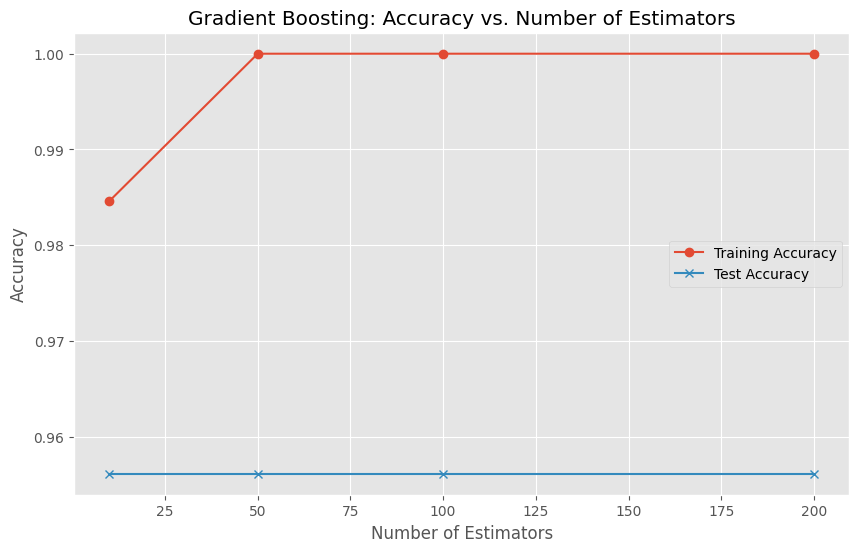

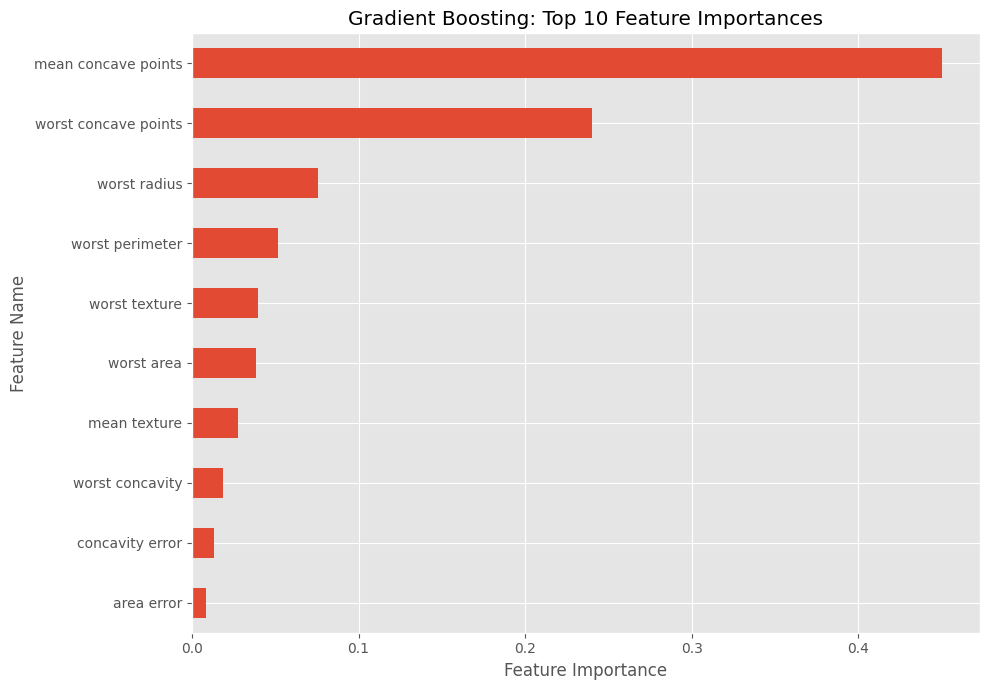


--- Gradient Boosting Performance ---
n_estimators   Train Accuracy    Test Accuracy     Gap (Train-Test)    
----------------------------------------------------------------------
10             0.9846            0.9561            0.0285              
50             1.0000            0.9561            0.0439              
100            1.0000            0.9561            0.0439              
200            1.0000            0.9561            0.0439              
----------------------------------------------------------------------


In [59]:
# Skeleton for TODO 6

n_estimators_list = [10, 50, 100, 200]
gb_train_accuracies = []
gb_test_accuracies = []

# Keep track of the last trained model for feature importance
final_gb_model = None

# Train gradient boosting models with different n_estimators
for n_est in n_estimators_list:
    gb_model = GradientBoostingClassifier(n_estimators=n_est, random_state=42)
    gb_model.fit(X_train_cancer, y_train_cancer)

    gb_train_accuracies.append(gb_model.score(X_train_cancer, y_train_cancer))
    gb_test_accuracies.append(gb_model.score(X_test_cancer, y_test_cancer))
    final_gb_model = gb_model

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_list, gb_train_accuracies, label='Training Accuracy', marker='o')
plt.plot(n_estimators_list, gb_test_accuracies, label='Test Accuracy', marker='x')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting: Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

# Plot feature importance
if final_gb_model is not None:
    cancer_data = load_breast_cancer()
    feature_names = cancer_data.feature_names
    importances = final_gb_model.feature_importances_

    feature_importance_series = pd.Series(importances, index=feature_names)
    top_10_features = feature_importance_series.nlargest(10)

    plt.figure(figsize=(10, 7))
    top_10_features.plot(kind='barh')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title('Gradient Boosting: Top 10 Feature Importances')
    plt.gca().invert_yaxis()
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

# Print results table
print("\n--- Gradient Boosting Performance ---")
print(f"{'n_estimators':<15}{'Train Accuracy':<18}{'Test Accuracy':<18}{'Gap (Train-Test)':<20}")
print("-" * 70)
for i, n_est in enumerate(n_estimators_list):
    train_acc = gb_train_accuracies[i]
    test_acc = gb_test_accuracies[i]
    gap = train_acc - test_acc
    print(f"{n_est:<15}{train_acc:<18.4f}{test_acc:<18.4f}{gap:<20.4f}")
print("-" * 70)

# Answer: How does Gradient Boosting differ from Random Forest?
# Random Forest builds many trees independently (in parallel) and averages their predictions. It focuses on reducing variance.
# Gradient Boosting builds trees one by one (sequentially), where each new tree tries to fix the errors of the previous ones. It focuses on reducing bias (errors).

## 7. Random Forest

Random Forest builds multiple decision trees in parallel using random subsets of features and samples, then aggregates their predictions.

### **TODO 7:** Random Forest Classifier

**Detailed Steps:**
1. **Set up the experiment:**
   - Use same n_estimators values as TODO 6: [10, 50, 100, 200]
   - Initialize lists to store train/test accuracies

2. **Train Random Forest models:**
   - Loop through each n_estimators value
   - Create `RandomForestClassifier(n_estimators=n_est, random_state=42)`
   - Fit on training data
   - Record both training and test accuracies
   - Keep the final model for feature importance

3. **Create comparison visualizations:**
   - Plot 1: Compare RF and GB learning curves on same plot
     - Plot RF train/test accuracy
     - Plot GB train/test accuracy (from TODO 6)
     - Use different line styles to distinguish
   - Plot 2: Compare feature importances side-by-side
     - Create bar chart comparing RF and GB for top 10 features

4. **Print results:**
   - Table showing RF n_estimators, train/test accuracy, and gap
   - Final comparison: RF vs GB test accuracy

5. **Answer the question:**
   - Explain why Random Forest uses random feature subsets
   - Discuss decorrelation of trees
   - Explain variance reduction through averaging

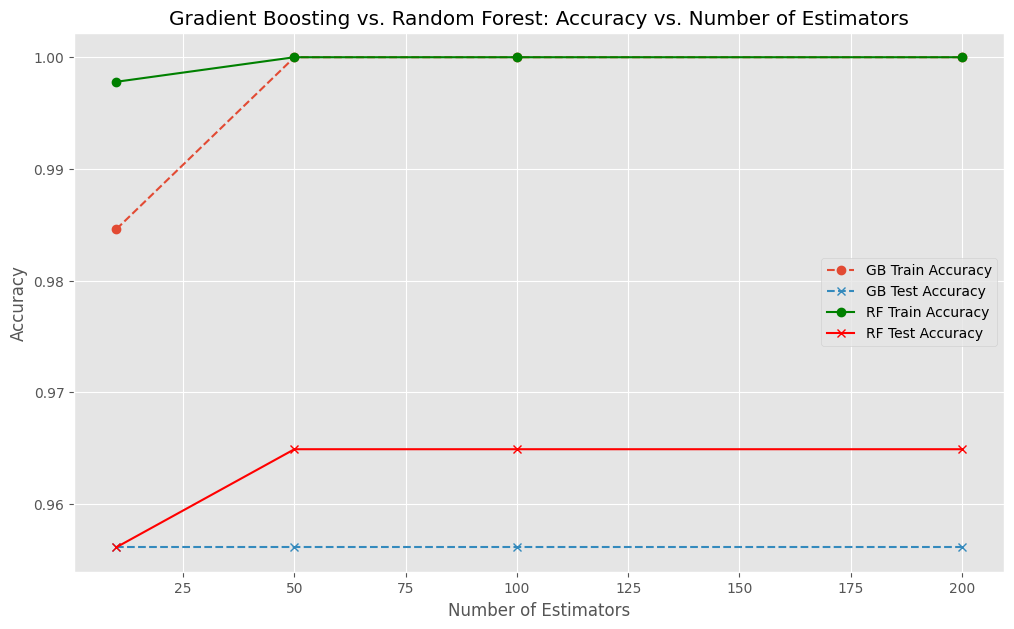

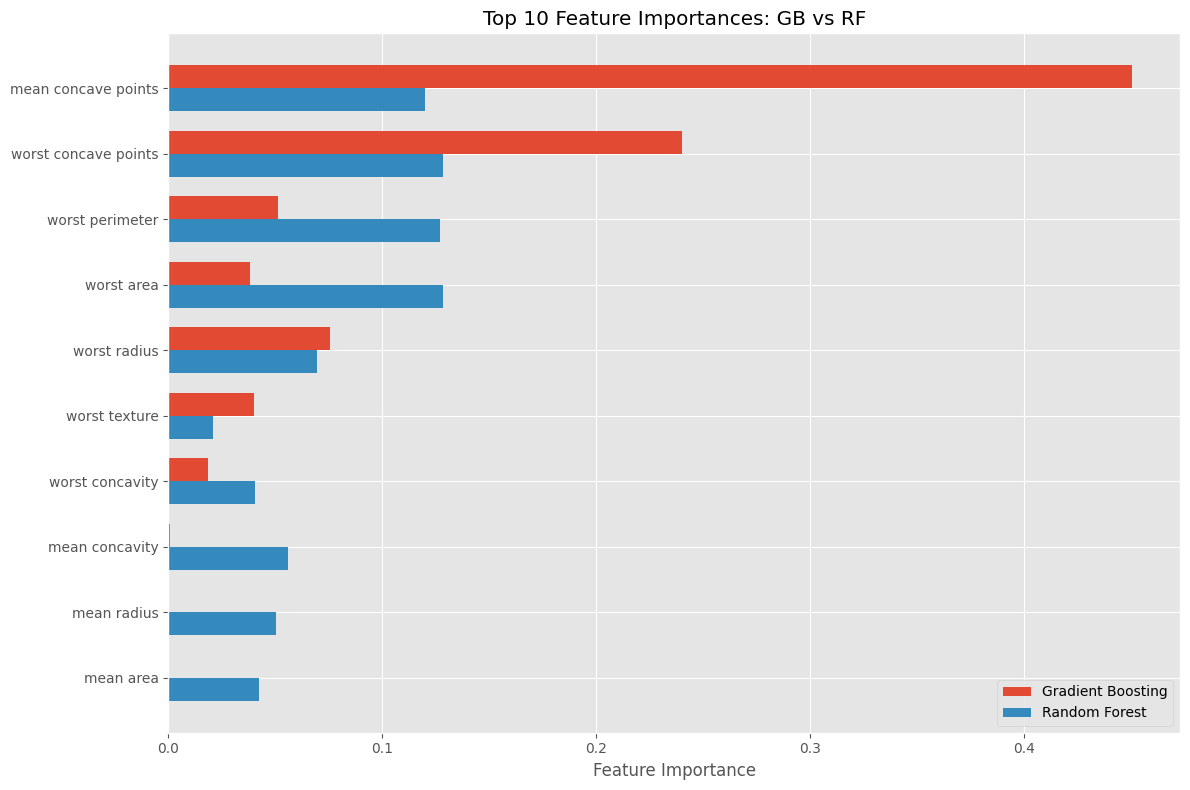


--- Random Forest Performance ---
n_estimators   Train Accuracy    Test Accuracy     Gap (Train-Test)    
----------------------------------------------------------------------
10             0.9978            0.9561            0.0417              
50             1.0000            0.9649            0.0351              
100            1.0000            0.9649            0.0351              
200            1.0000            0.9649            0.0351              
----------------------------------------------------------------------

Final Test Accuracy (Gradient Boosting, 200 estimators): 0.9561
Final Test Accuracy (Random Forest, 200 estimators): 0.9649


In [60]:
# Skeleton for TODO 7

n_estimators_list = [10, 50, 100, 200]
rf_train_accuracies = []
rf_test_accuracies = []

# Keep track of the last trained model for feature importance
final_rf_model = None

# Train random forest models
for n_est in n_estimators_list:
    rf_model = RandomForestClassifier(n_estimators=n_est, random_state=42)
    rf_model.fit(X_train_cancer, y_train_cancer)

    rf_train_accuracies.append(rf_model.score(X_train_cancer, y_train_cancer))
    rf_test_accuracies.append(rf_model.score(X_test_cancer, y_test_cancer))
    final_rf_model = rf_model

# Plot comparisons
# Plot comparison of learning curves
plt.figure(figsize=(12, 7))
plt.plot(n_estimators_list, gb_train_accuracies, label='GB Train Accuracy', marker='o', linestyle='--')
plt.plot(n_estimators_list, gb_test_accuracies, label='GB Test Accuracy', marker='x', linestyle='--')
plt.plot(n_estimators_list, rf_train_accuracies, label='RF Train Accuracy', marker='o', color='green')
plt.plot(n_estimators_list, rf_test_accuracies, label='RF Test Accuracy', marker='x', color='red')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('Gradient Boosting vs. Random Forest: Accuracy vs. Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

# Plot comparison of feature importances
if final_gb_model is not None and final_rf_model is not None:
    cancer_data = load_breast_cancer()
    feature_names = cancer_data.feature_names

    gb_importances = final_gb_model.feature_importances_
    rf_importances = final_rf_model.feature_importances_

    gb_feature_importance_series = pd.Series(gb_importances, index=feature_names)
    rf_feature_importance_series = pd.Series(rf_importances, index=feature_names)

    # Get top 10 features based on combined importance
    combined_importance = gb_feature_importance_series.add(rf_feature_importance_series, fill_value=0)
    top_features_indices = combined_importance.nlargest(10).index

    gb_top_importances = gb_feature_importance_series[top_features_indices]
    rf_top_importances = rf_feature_importance_series[top_features_indices]

    x = np.arange(len(top_features_indices))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.barh(x - width/2, gb_top_importances, width, label='Gradient Boosting')
    rects2 = ax.barh(x + width/2, rf_top_importances, width, label='Random Forest')

    # Add text for labels, title and custom x-axis tick labels, etc.
    ax.set_xlabel('Feature Importance')
    ax.set_title('Top 10 Feature Importances: GB vs RF')
    ax.set_yticks(x)
    ax.set_yticklabels(top_features_indices)
    ax.legend()
    ax.invert_yaxis()
    plt.tight_layout()
    plt.show()

# Print RF results table
print("\n--- Random Forest Performance ---")
print(f"{'n_estimators':<15}{'Train Accuracy':<18}{'Test Accuracy':<18}{'Gap (Train-Test)':<20}")
print("-" * 70)
for i, n_est in enumerate(n_estimators_list):
    train_acc = rf_train_accuracies[i]
    test_acc = rf_test_accuracies[i]
    gap = train_acc - test_acc
    print(f"{n_est:<15}{train_acc:<18.4f}{test_acc:<18.4f}{gap:<20.4f}")
print("-" * 70)

# Final comparison
print(f"\nFinal Test Accuracy (Gradient Boosting, {n_estimators_list[-1]} estimators): {gb_test_accuracies[-1]:.4f}")
print(f"Final Test Accuracy (Random Forest, {n_estimators_list[-1]} estimators): {rf_test_accuracies[-1]:.4f}")

# Answer: Why does Random Forest use random feature subsets?
# Random Forest uses random feature subsets (at each split in each tree) to 'decorrelate' the trees in the ensemble.
# If all trees were built using all features, they would likely make similar errors, especially on strong predictors.
# By introducing randomness in feature selection, each tree becomes more independent. This independence reduces the overall variance of the ensemble.
# When predictions from many decorrelated trees are averaged, the errors tend to cancel each other out, leading to a more robust and accurate model than any single tree.

## 8. Logistic Regression

Logistic Regression is a linear model for binary classification that uses the logistic sigmoid function to map predictions to probabilities.

### **TODO 8:** Implement Logistic Regression from Scratch and Compare with sklearn

**Detailed Steps:**
1. **Implement SimpleLogisticRegression class:**
   - `__init__`: Initialize learning_rate, num_iterations, weights, bias, loss_history
   - `sigmoid(z)`: Implement sigmoid function with overflow protection
   - `fit(X, y)`:
     - Initialize weights to zeros, bias to 0
     - Loop for num_iterations:
       - Calculate predictions using sigmoid
       - Calculate binary cross-entropy loss
       - Calculate gradients (dw, db)
       - Update weights and bias using gradient descent
   - `predict_proba(X)`: Return probabilities using sigmoid
   - `predict(X)`: Return binary labels (threshold at 0.5)

2. **Train your implementation:**
   - Create `SimpleLogisticRegression(learning_rate=0.01, num_iterations=1000)`
   - Fit on X_train, y_train

3. **Train sklearn's implementation:**
   - Create `LogisticRegression(max_iter=1000)`
   - Fit on X_train, y_train

4. **Compare accuracies:**
   - Calculate train/test accuracy for your implementation
   - Calculate train/test accuracy for sklearn
   - Print comparison table

5. **Visualize decision boundaries:**
   - Create helper function `plot_decision_boundary()`
   - Plot decision boundary for your implementation
   - Plot decision boundary for sklearn implementation

6. **Plot training loss:**
   - Plot loss_history vs iterations
   - Should show decreasing loss over time

7. **Answer the question:**
   - Explain why we use sigmoid function
   - Discuss probability interpretation, differentiability, nice derivative property

In [61]:
# Skeleton for TODO 8

class SimpleLogisticRegression:
    """
    Simple Logistic Regression implementation using gradient descent
    """
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid(self, z):
        """
        Sigmoid function
        """
        # To prevent overflow for very large negative z
        z = np.clip(z, -500, 500)
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the logistic regression model
        """
        n_samples, n_features = X.shape

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for iteration in range(self.num_iterations):
            # 1. Calculate predictions
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # 2. Calculate binary cross-entropy loss
            epsilon = 1e-9
            # Clip probabilities to avoid log(0)
            y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)
            current_loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.loss_history.append(current_loss)

            # 3. Calculate gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # 4. Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict_proba(self, X):
        """
        Predict probabilities
        """
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X):
        """
        Predict binary labels (0 or 1)
        """
        y_predicted_proba = self.predict_proba(X)
        return np.where(y_predicted_proba >= 0.5, 1, 0)

print("Logistic Regression class implemented!")

Logistic Regression class implemented!



--- Logistic Regression Accuracy Comparison ---
My LR (Train): 0.9167, (Test): 0.9500
Sklearn LR (Train): 0.9167, (Test): 0.9500


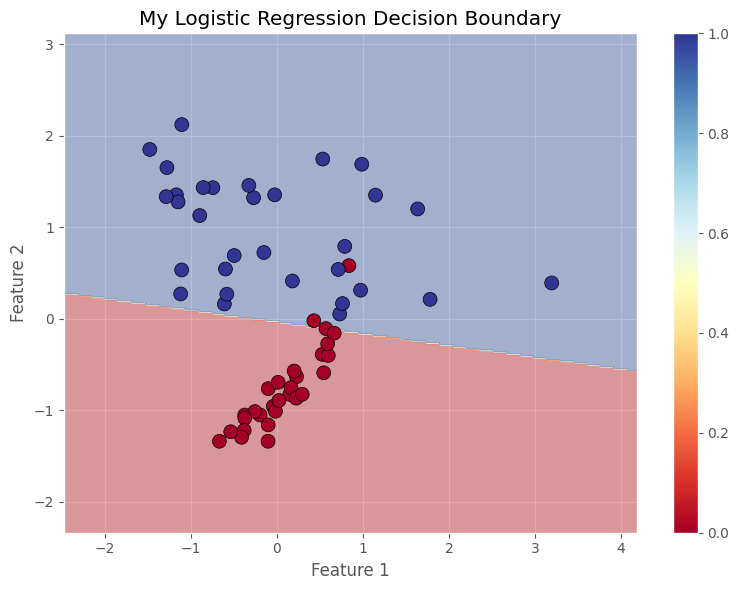

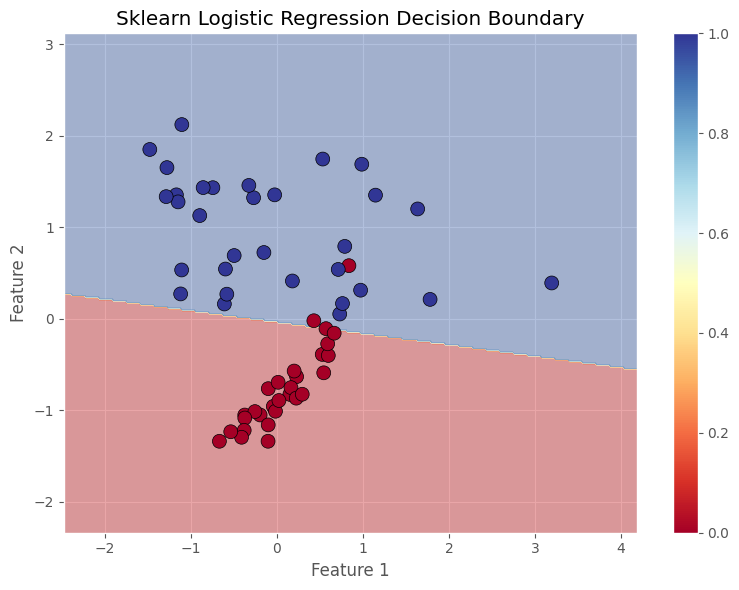

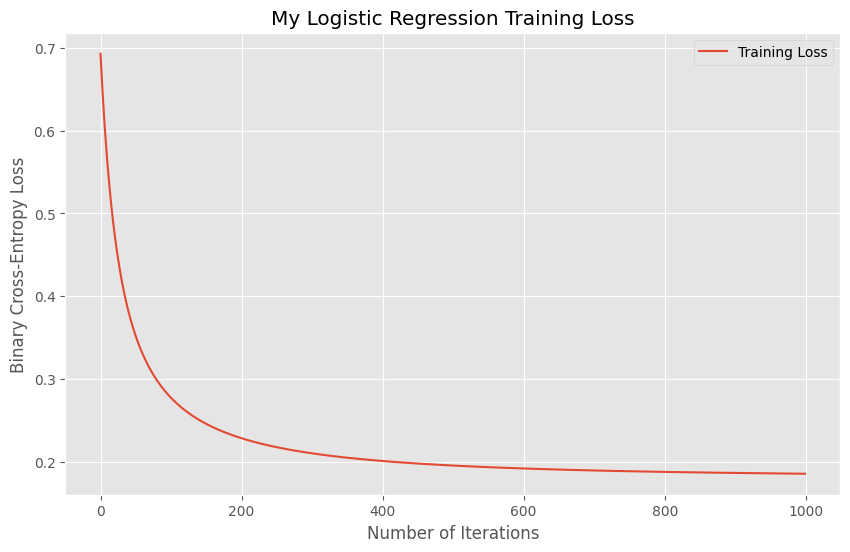

In [62]:
# Skeleton for TODO 8 (continued)

# Prepare data for 2D visualization (using only first two features)
X_2d = X[:, :2]
X_train_2d, X_test_2d, y_train_2d, y_test_2d = train_test_split(X_2d, y, test_size=0.2, random_state=42)

# Train your implementation
my_lr = SimpleLogisticRegression(learning_rate=0.1, num_iterations=1000)
my_lr.fit(X_train_2d, y_train_2d)

# Train sklearn's logistic regression
sk_lr = LogisticRegression(max_iter=1000, random_state=42)
sk_lr.fit(X_train_2d, y_train_2d)

# Compare accuracies
my_lr_train_acc = accuracy_score(y_train_2d, my_lr.predict(X_train_2d))
my_lr_test_acc = accuracy_score(y_test_2d, my_lr.predict(X_test_2d))

sk_lr_train_acc = accuracy_score(y_train_2d, sk_lr.predict(X_train_2d))
sk_lr_test_acc = accuracy_score(y_test_2d, sk_lr.predict(X_test_2d))

print("\n--- Logistic Regression Accuracy Comparison ---")
print(f"My LR (Train): {my_lr_train_acc:.4f}, (Test): {my_lr_test_acc:.4f}")
print(f"Sklearn LR (Train): {sk_lr_train_acc:.4f}, (Test): {sk_lr_test_acc:.4f}")

# Plot decision boundaries (for 2D data)
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Handle custom model prediction vs sklearn model prediction
    if hasattr(model, 'predict_proba'):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    elif hasattr(model, 'weights') and hasattr(model, 'bias'): # Custom model
        temp_model = SimpleLogisticRegression()
        temp_model.weights = model.weights
        temp_model.bias = model.bias
        Z = temp_model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        raise AttributeError("Model does not have a predict method or weights/bias.")

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black', s=100)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

plot_decision_boundary(X_test_2d, y_test_2d, my_lr, 'My Logistic Regression Decision Boundary')
plot_decision_boundary(X_test_2d, y_test_2d, sk_lr, 'Sklearn Logistic Regression Decision Boundary')

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(range(len(my_lr.loss_history)), my_lr.loss_history, label='Training Loss')
plt.xlabel('Number of Iterations')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('My Logistic Regression Training Loss')
plt.legend()
plt.grid(True)
plt.show()

# Answer: Why do we use the sigmoid function in logistic regression?
# We use the sigmoid function in logistic regression because it:
# Converts any real number into a probability (between 0 and 1).
# Is smooth and differentiable, essential for gradient-based optimization.
# Allows the model to output probabilities, which is crucial for binary classification.